# Implementation of the AC-3 algorithm

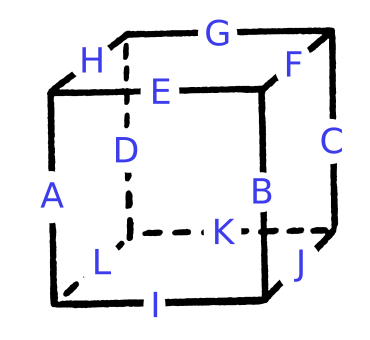

In [1]:
class Variable:
    def __init__(self, id_, domain):
        self.id = id_
        self.domain = domain
    def __str__(self):
        return f'{self.id}\t{self.domain}'

In [2]:
values = [
    ['A', [1]],
    ['B', [12]],
    ['C', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['D', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['E', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['F', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['G', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['H', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['I', [7]],
    ['J', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['K', [1,2,3,4,5,6,7,8,9,10,11,12]],
    ['L', [1,2,3,4,5,6,7,8,9,10,11,12]]
]

In [3]:
variables = {}
for item in values:
    variables[item[0]] = Variable(*item)

In [4]:
# print(variables['X1'])

In [5]:
#Definir restricciones

def equalSum(a, b, c, d, e, f, g, h, i, j, k, l):
    if (a + e + b + i == f + c + j + b) and (a + e + b + i == f + g + h + e) and (a + e + b + i == h +a +l + d) and (a + e + b + i == g + d + c + k) and (a + e + b + i == k + j + i + l):
        return True
    else:
        return False
    
def different(a, b, c, d, e, f, g, h, i, j, k, l):
    if len([a, b, c, d, e, f, g, h, i, j, k, l]) == len(set([a, b, c, d, e, f, g, h, i, j, k, l])):
        return True
    else:
        return False
    
def sum26(x1, x2, x3, x4):
    if x1 + x2 + x3 + x4 == 26:
        return True
    else:
        return False
    

In [6]:
class Constrain:
    def __init__(self, id_, rel_variables, func):
        self.id = id_
        self.related_variables = rel_variables
        self.function = func
        
    # def evaluate(self, variable):
    #     return self.func(*self.related_variables)

In [7]:
# a = Constrain('C1', ['X1', 'X2'], different)

In [8]:
# constraints_values = [ ['R01', [x1, x2, x3, x4, x5, x6, x7, x8], equalSum],
#                        ['R02', [x1, x2, x3, x4, x2, x3, x6, x7], equalSum],
#                        ['R03', [x1, x2, x3, x4, x3, x4, x7, x8], equalSum],
#                        ['R04', [x1, x2, x3, x4, x1, x4, x5, x8], equalSum],
#                        ['R05', [x1, x2, x3, x4, x4, x3, x7, x8], equalSum],
#                        ['R06', [x1, x2], different],
#                        ['R07', [x1, x3], different],
#                        ['R08', [x1, x4], different],
#                        ['R09', [x1, x5], different],
#                        ['R10', [x1, x6], different],
#                        ['R11', [x1, x7], different],
#                        ['R12', [x1, x8], different],
#                        ['R13', [x2, x3], different],
#                        ['R14', [x2, x4], different],
#                        ['R15', [x2, x5], different],
#                        ['R16', [x2, x6], different],
#                        ['R17', [x2, x7], different],
#                        ['R18', [x2, x8], different],
#                        ['R19', [x3, x4], different],
#                        ['R20', [x3, x5], different],
#                        ['R21', [x3, x6], different],
#                        ['R22', [x3, x7], different],
#                        ['R23', [x3, x8], different],
#                        ['R24', [x4, x5], different],
#                        ['R25', [x4, x6], different],
#                        ['R26', [x4, x7], different],
#                        ['R27', [x4, x8], different],
#                        ['R28', [x5, x6], different],
#                        ['R29', [x5, x7], different],
#                        ['R30', [x5, x8], different],
#                        ['R31', [x6, x7], different],
#                        ['R32', [x6, x8], different],
#                        ['R33', [x7, x8], different],
#                      ]

In [9]:
constraints_values = [
                       ['R01', ['A', 'E', 'B', 'I'], sum26],
                       ['R02', ['F', 'C', 'B', 'J'], sum26],
                       ['R03', ['G', 'F', 'E', 'H'], sum26],
                       ['R04', ['H', 'A', 'D', 'L'], sum26],
                       ['R05', ['G', 'D', 'C', 'K'], sum26],
                       ['R06', ['K', 'J', 'L', 'I'], sum26], 
                       ['R07', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], different],
                       ['R08', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], equalSum]
                    ]

In [10]:
constrains = {}
for item in constraints_values:
    constrains[item[0]] = Constrain(*item)

In [11]:
from collections import deque
edges = []
for key in constrains:
    for var in constrains[key].related_variables:
        # print(var, key)
        if (var, key) not in edges:
            edges.append((var, key))

In [12]:
edges_deque = deque(edges)

In [13]:
from itertools import product

In [14]:
while(edges_deque):
    variable_name, constraint_name = edges_deque.popleft()
    # print(variable_name, constraint_name)
    for value in list(variables[variable_name].domain):
        # print('Watching: ', value)
        valid = False
        for combination in product(*[variables[v].domain if v != variable_name else [value] for v in constrains[constraint_name].related_variables]):
            if constrains[constraint_name].function(*combination):
                valid = True
                break
        if not valid:
            # print('REDUCCION')
            variables[variable_name].domain.remove(value)
            
            related_cons = [constrain for variable, constrain in edges if variable == variable_name]
            affected_edges = [(v, c) for v, c in edges if c in related_cons and v != variable_name]
            edges_deque += deque([edge for edge in affected_edges if edge not in edges_deque])
            
        # print([variables[v].domain for v in constrains[constraint_name].related_variables])
        # for combination in product([variables[v].domain for v in constrains[constraint_name].related_variables]):
        #     print(combination)
        

In [15]:
for var in variables:
    print(variables[var].domain)

[1]
[12]
[2, 3, 4, 5, 8, 9]
[4, 5, 8, 9, 10, 11]
[6]
[2, 3, 4, 5, 8, 9, 10]
[2, 3, 4, 5, 8, 9, 10, 11]
[3, 4, 5, 8, 9, 10, 11]
[7]
[2, 3, 4, 5, 8, 9, 10]
[2, 3, 4, 5, 8, 9, 10, 11]
[3, 4, 5, 8, 9, 10, 11]


In [18]:
for combination in product(*[variables[v].domain for v in constrains[constraint_name].related_variables]):
    for c in constrains:
        if constrains[c].function(*combination) == False:
            continue
    print(combination)

TypeError: sum26() takes 4 positional arguments but 12 were given